In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

Working with data instructions:

    check the missing values in all your columns. please pay attention that not all missing values will be NaNs. Make sure that non-nan values are valid.
    
    check data type of all your columns and make sure they corresponde with what you expect them to be. dates should be of datetime format, numbers should be of either int or float.
    
    plot distribution of numeric columns and histogram of categorical columns.
    
    calculate and visualize top 5 nationalities of artists
    
    calculate and visualize top 5 nationalities of artists by gender
    
    merge two dataframes using ConstituentID as the key
    
    pick a nationality and filter the merged data to find all artworks done by artists of that nationality. How do you handle artworks that have multiple artists?
    
    Do one extra analysis of your data that picked your interest.


In [4]:
artists = pd.read_csv('/content/Artists.csv', sep=',')
artworks = pd.read_csv('/content/Artworks.csv', sep=',')

In [5]:
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15595 entries, 0 to 15594
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ConstituentID  15595 non-null  int64  
 1   DisplayName    15595 non-null  object 
 2   ArtistBio      13401 non-null  object 
 3   Nationality    13107 non-null  object 
 4   Gender         12352 non-null  object 
 5   BeginDate      15595 non-null  int64  
 6   EndDate        15595 non-null  int64  
 7   Wiki QID       3247 non-null   object 
 8   ULAN           2931 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.1+ MB


In [6]:
artworks.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(male),1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(male),1987,Paint and colored pencil on print,...,NaN,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(male),1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [7]:
sel_cols = ['ArtistBio', 'Nationality', 'BeginDate', 'EndDate', 'Gender']

pattern = '|'.join(['\(', '\)'])

artworks[sel_cols] = artworks[sel_cols].replace(pattern, '', regex=True)

In [8]:
artworks.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"Austrian, 1841–1918",Austrian,1841,1918,male,1896,Ink and cut-and-pasted painted pages on paper,...,NaN,NaN,NaN,NaN,48.6000,NaN,NaN,168.9000,NaN,NaN
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"French, born 1944",French,1944,0,male,1987,Paint and colored pencil on print,...,NaN,NaN,NaN,NaN,40.6401,NaN,NaN,29.8451,NaN,NaN
2,"Villa project, outside Vienna, Austria (Elevat...",Emil Hoppe,7605,"Austrian, 1876–1957",Austrian,1876,1957,male,1903,"Graphite, pen, color pencil, ink, and gouache ...",...,NaN,NaN,NaN,NaN,34.3000,NaN,NaN,31.8000,NaN,NaN
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"French and Swiss, born Switzerland 1944",,1944,0,male,1980,Photographic reproduction with colored synthet...,...,NaN,NaN,NaN,NaN,50.8000,NaN,NaN,50.8000,NaN,NaN
4,"Villa project, outside Vienna, Austria (Exteri...",Emil Hoppe,7605,"Austrian, 1876–1957",Austrian,1876,1957,male,1903,"Graphite, color pencil, ink, and gouache on tr...",...,NaN,NaN,NaN,NaN,38.4000,NaN,NaN,19.1000,NaN,NaN


In [9]:
datefix = ['BeginDate', 'EndDate', 'Date']
artworks[datefix] = artworks[datefix].apply(pd.to_datetime,
                                              format='%Y',
                                              errors='coerce')

In [10]:
artworks[datefix].head()

,BeginDate,EndDate,Date
0,1841-01-01,1918-01-01,1896-01-01
1,1944-01-01,NaT,1987-01-01
2,1876-01-01,1957-01-01,1903-01-01
3,1944-01-01,NaT,1980-01-01
4,1876-01-01,1957-01-01,1903-01-01


In [11]:
artworks[datefix] = artworks[datefix].apply(lambda x: x.dt.year, axis=0)

In [12]:
artworks[datefix].head()

,BeginDate,EndDate,Date
0,1841.0,1918.0,1896.0
1,1944.0,NaN,1987.0
2,1876.0,1957.0,1903.0
3,1944.0,NaN,1980.0
4,1876.0,1957.0,1903.0


In [13]:
select = ['BeginDate', 'EndDate']
artists[select] = artists[select].apply(pd.to_datetime,
                                                    format='%Y',
                                                   errors='coerce')
artists[select] = artists[select].apply(lambda x: x.dt.year, axis=0)
artists.head()

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,male,1930.0,1992.0,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,male,1936.0,NaN,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,male,1941.0,NaN,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,male,1946.0,NaN,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,male,1941.0,NaN,NaN,NaN


Text(0.5, 1.0, 'MoMA Artists by Nationality')

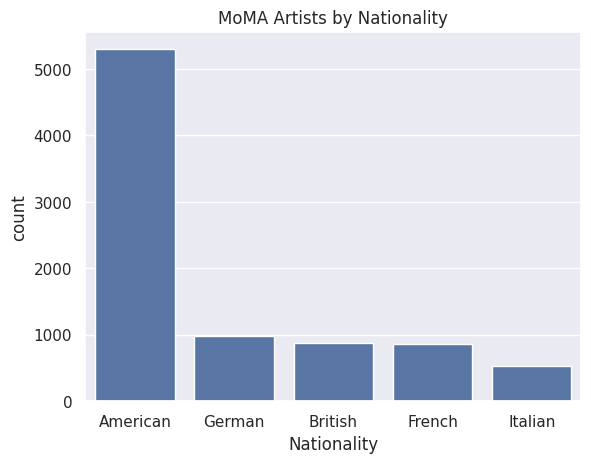

In [14]:
sb.set(font_scale = 1)
ax = sb.countplot(x="Nationality",
                   data=artists,
                   order=artists['Nationality'].value_counts().iloc[:5].index
                  )
plt.title("MoMA Artists by Nationality")

Text(0.5, 1.0, 'MoMA Artists by Nationality - Separate Gender')

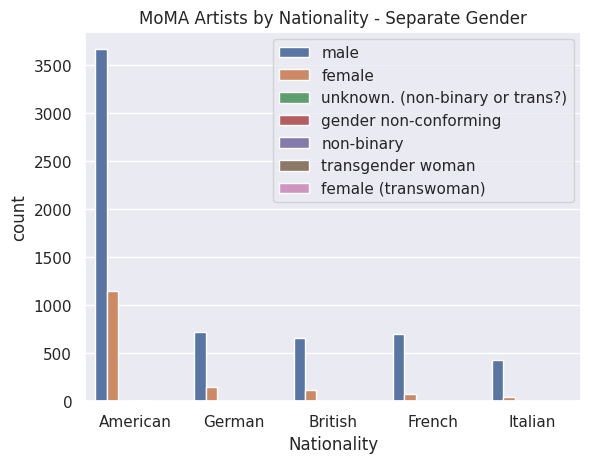

In [15]:
sb.set(font_scale = 1)
ax = sb.countplot(x="Nationality",
                   data=artists,
                  hue='Gender',
                   order=artists['Nationality'].value_counts().iloc[:5].index
                  )
plt.legend(loc='upper right')
plt.title("MoMA Artists by Nationality - Separate Gender")

In [16]:
print("% of missing values in Artists dataset")
100 * artists.isnull().sum(axis = 0)/ len(artists)

% of missing values in Artists dataset


,0
ConstituentID,0.000000
DisplayName,0.000000
ArtistBio,14.068612
Nationality,15.953831
Gender,20.795127
BeginDate,22.795768
EndDate,64.398846
Wiki QID,79.179224
ULAN,81.205515


In [17]:
print("% of missing values in Artworks dataset")
100 * artworks.isnull().sum(axis = 0)/ len(artworks)

% of missing values in Artworks dataset


,0
Title,0.000000
Artist,0.054735
ConstituentID,0.054735
ArtistBio,1.744443
Nationality,0.054735
BeginDate,7.163162
EndDate,24.137931
Gender,0.054735
Date,36.495577
Medium,12.016879


In [25]:
artcombined = pd.DataFrame.join(artists, artworks, on='ConstituentID', how='right', lsuffix='.art', rsuffix='.works')

In [27]:
artcombined.dtypes

,0
ConstituentID,int64
ConstituentID.art,float64
DisplayName,object
ArtistBio.art,object
Nationality.art,object
Gender.art,object
BeginDate.art,float64
EndDate.art,float64
Wiki QID,object
ULAN,float64


In [33]:
artcombined.iloc[65:67, :]

,ConstituentID,ConstituentID.art,DisplayName,ArtistBio.art,Nationality.art,Gender.art,BeginDate.art,EndDate.art,Wiki QID,ULAN,...,OnView,Circumference (cm),Depth (cm),Diameter (cm),Height (cm),Length (cm),Weight (kg),Width (cm),Seat Height (cm),Duration (sec.)
57.0,65,65.0,Kenneth M. Adams,"American, 1897–1966",American,male,1897.0,1966.0,NaN,NaN,...,NaN,NaN,NaN,NaN,34.9251,NaN,NaN,113.3477,NaN,NaN
58.0,66,66.0,Robert Adams,"American, born 1937",American,male,1937.0,NaN,Q1392710,500037036.0,...,NaN,NaN,NaN,NaN,63.5001,NaN,NaN,99.0602,NaN,NaN


In [34]:
artcombined.columns

Index(['ConstituentID', 'ConstituentID.art', 'DisplayName', 'ArtistBio.art',
       'Nationality.art', 'Gender.art', 'BeginDate.art', 'EndDate.art',
       'Wiki QID', 'ULAN', 'Title', 'Artist', 'ConstituentID.works',
       'ArtistBio.works', 'Nationality.works', 'BeginDate.works',
       'EndDate.works', 'Gender.works', 'Date', 'Medium', 'Dimensions',
       'CreditLine', 'AccessionNumber', 'Classification', 'Department',
       'DateAcquired', 'Cataloged', 'ObjectID', 'URL', 'ImageURL', 'OnView',
       'Circumference (cm)', 'Depth (cm)', 'Diameter (cm)', 'Height (cm)',
       'Length (cm)', 'Weight (kg)', 'Width (cm)', 'Seat Height (cm)',
       'Duration (sec.)'],
      dtype='object')

In [35]:
cols = artworks.columns.to_list()
cols.remove('ConstituentID')

In [36]:
artworks.shape

(56637, 30)

In [37]:
artworks_exp = artworks.set_index(cols).apply(lambda x: x.str.split(',').explode()).reset_index()
artworks_exp.shape

(59907, 30)

In [38]:
drop_cols = ['ArtistBio', 'Gender', 'Nationality',
            'BeginDate', 'EndDate']
artworks_exp = artworks_exp.drop(columns=drop_cols)
artworks_exp.shape

(59907, 25)

In [39]:
artworks_exp['ConstituentID'] = pd.to_numeric(artworks_exp['ConstituentID'])

In [53]:
artmerged = pd.merge(artworks_exp, artists,
                     on='ConstituentID',
                     how='left')
artmerged.shape

(59907, 33)

In [42]:
artmerged.dtypes

,0
Title,object
Artist,object
Date,float64
Medium,object
Dimensions,object
CreditLine,object
AccessionNumber,object
Classification,object
Department,object
DateAcquired,object


In [50]:
artmerged[artmerged.Nationality == "Spanish"].shape[0]


1924

In [52]:
artmerged = artmerged.dropna(subset = ['ArtistBio'])
print(f"# of rows without bio: {153786 - artmerged.shape[0]}")
artmerged[artmerged['ArtistBio'].str.contains('spain')].shape[0]

# of rows without bio: 95403


0